# Q1

In [ ]:
import numpy as np
np.set_printoptions(precision=6, suppress=False, formatter={'float_kind': '{: .6e}'.format})

# Define the data points
x = np.array([0.3, 0.4, 0.5, 0.6])
e_power_x = np.array([ 0.740818,  0.670320, 0.606531,  0.548812])
y = x - e_power_x

# Define the function for which we want to find the root
def f(x):
    return x - np.exp(-x)

# Bisection method
def bisection_method(f, a, b, tol=1e-15, max_iter=1000):
    if f(a) * f(b) >= 0:
        raise ValueError("The function must have different signs at the endpoints a and b.")
    
    for _ in range(max_iter):
        c = (a + b) / 2
        if f(c) == 0 or (b - a) / 2 < tol:
            return c
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
    return c


# Use bisection method to find the root
exact_solution = bisection_method(f, 0, 1)
print(f"Root found by bisection method (Exact approximation):{exact_solution}")

# Neville's Algorithm for inverse interpolation
def nevilles(x,y,p):
    n = len(x)
    Q = np.zeros((n,n))
    Q[:,0] = y

    for i in range(1,n):
        for j in range(i,n):
            Q[j,i] = ( (p - x[j-i])*Q[j,i-1] - (p - x[j])*Q[j-1,i-1])/(x[j] - x[j-i])

    return Q


# Apply Neville's Algorithm to approximate f^(-1)(0)
p = 0
Q = nevilles(y,x,p)  # We want to find f^(-1)(0)
n = len(Q)
approximation = Q[n-1,n-1]

print(Q)

# Calculate the relative error
relative_error = abs((approximation - exact_solution) / exact_solution)

# Report the results
print(f"Approximation of f^(-1)(0): {approximation}")
print(f"Relative error: {relative_error}")
print(y)

# Calculate the error matrix
error_matrix = np.abs(Q - exact_solution)/exact_solution

# Print the error matrix
print("Error Matrix:")
print(error_matrix)


# Q2

[0.7  2.11 3.25 2.11 0.7  0.88 3.25]
[ 0.  2.  4.  6.  8. 10. 12.]


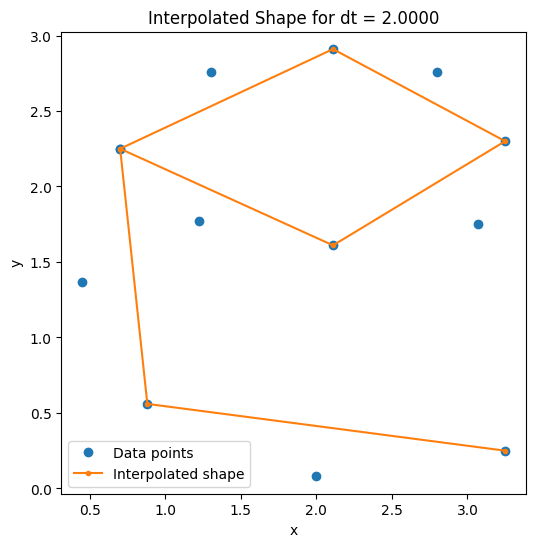

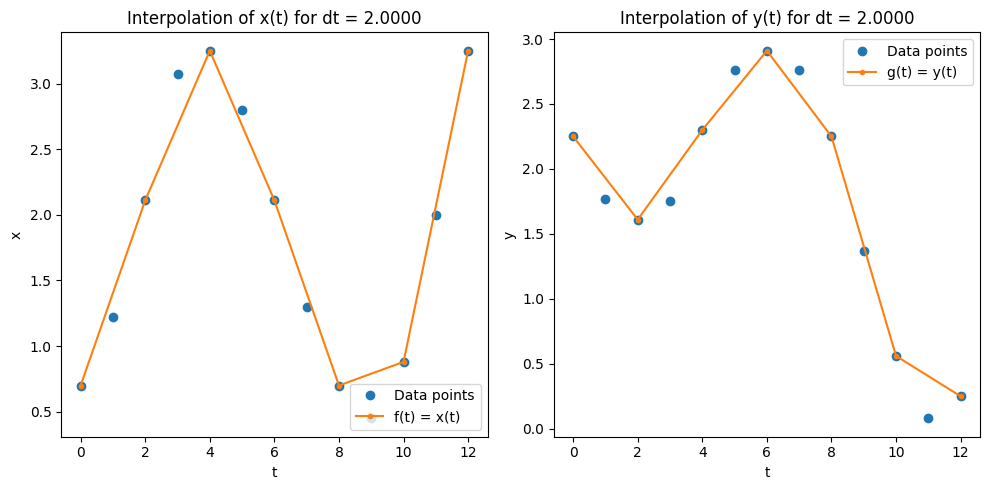

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
t = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0])
x = np.array([0.70, 1.22, 2.11, 3.07, 3.25, 2.80, 2.11, 1.30, 0.70, 0.45, 0.88, 2.00, 3.25])
y = np.array([2.25, 1.77, 1.61, 1.75, 2.30, 2.76, 2.91, 2.76, 2.25, 1.37, 0.56, 0.08, 0.25])

# Neville's Algorithm for interpolation
def nevilles(x,y,p):
    n = len(x)
    Q = np.zeros((n,n))
    Q[:,0] = y

    for i in range(1,n):
        for j in range(i,n):
            Q[j,i] = ( (p - x[j-i])*Q[j,i-1] - (p - x[j])*Q[j-1,i-1])/(x[j] - x[j-i])

    return Q

num_points = 97

# Define the range of t for interpolation
t_interp = np.linspace(0, 12, num_points)

# Interpolated values using Neville's method
x_interp = np.array([nevilles(t, x, t_val)[-1, -1] for t_val in t_interp])
y_interp = np.array([nevilles(t, y, t_val)[-1, -1] for t_val in t_interp])
print(x_interp)
print(t_interp)

# Plot the interpolated shape
plt.figure(figsize=(6, 6))
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.plot(x, y, 'o', label='Data points')
plt.plot(x_interp, y_interp, label=f'Interpolated shape', marker='o', markersize=3)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title(f'Interpolated Shape for dt = {12/(num_points-1):.4f}')
plt.axis('equal')
plt.show()

# Plot the interpolated shape
plt.figure(figsize=(10, 5))

# Plot f(t) and g(t)
plt.subplot(1, 2, 1)
plt.plot(t, x, 'o', label='Data points')
plt.plot(t_interp, x_interp, label='f(t) = x(t)', marker='o', markersize=3)
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title(f'Interpolation of x(t) for dt = {12/(num_points-1):.4f}')

plt.subplot(1, 2, 2)
plt.plot(t, y, 'o', label='Data points')
plt.plot(t_interp, y_interp, label='g(t) = y(t)', marker='o', markersize=3)
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title(f'Interpolation of y(t) for dt = {12/(num_points-1):.4f}')

plt.tight_layout()
plt.show()


# Q3

[[ 8.20854211e-02 -4.04271053e-02 -2.20377000e-01  7.19351051e-02
   8.26365797e-02 -1.24814240e-02  8.72891163e-02 -6.67504128e-03
   7.94110488e-02  1.90308461e-02 -1.45534433e-01  3.10688664e-03]
 [-1.11022302e-16  2.46256263e-01  1.24974947e-01 -5.36156052e-01
  -3.20350737e-01 -7.24409981e-02 -1.09885270e-01  1.51982079e-01
   1.31956955e-01  3.70190101e-01  4.27282640e-01 -9.32065991e-03]
 [ 4.37914579e-01  6.84170842e-01  1.05540205e+00  6.44220947e-01
  -2.12285842e-01 -6.05077578e-01 -7.87403846e-01 -7.45307038e-01
  -4.61368004e-01  4.07790526e-02  8.38251794e-01  1.25621377e+00]
 [ 7.00000000e-01  1.22000000e+00  2.11000000e+00  3.07000000e+00
   3.25000000e+00  2.80000000e+00  2.11000000e+00  1.30000000e+00
   7.00000000e-01  4.50000000e-01  8.80000000e-01  2.00000000e+00]]
[[ 7.22133367e-02 -4.10666837e-02  7.20533982e-02 -1.37146909e-01
  -2.34657614e-02  1.10099546e-02 -1.05740572e-02 -2.87137258e-02
   1.15428961e-01  6.99788381e-03  1.16579504e-01 -1.53315901e-01]
 [ 1

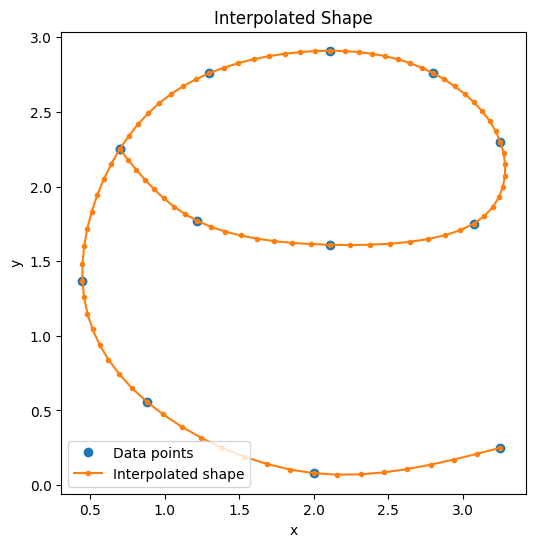

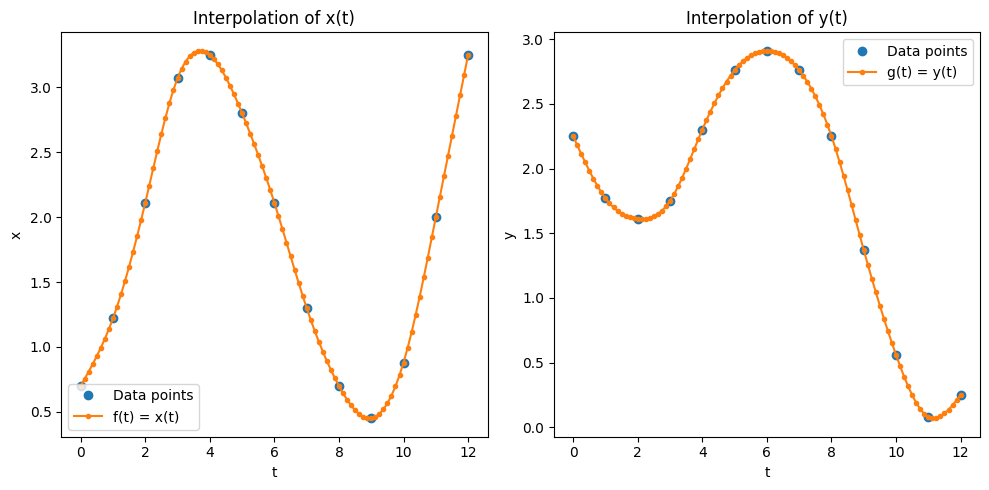

In [20]:
t = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0])
x = np.array([0.70, 1.22, 2.11, 3.07, 3.25, 2.80, 2.11, 1.30, 0.70, 0.45, 0.88, 2.00, 3.25])
y = np.array([2.25, 1.77, 1.61, 1.75, 2.30, 2.76, 2.91, 2.76, 2.25, 1.37, 0.56, 0.08, 0.25])

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

cs_x = CubicSpline(t, x, bc_type='natural')
cs_y = CubicSpline(t, y, bc_type='natural')

t_interp = np.linspace(0, 12, 97)

x_interp = cs_x(t_interp)
y_interp = cs_y(t_interp)

coeffs_x = cs_x.c
coeffs_y = cs_y.c

print(coeffs_x)
print(coeffs_y)
# Plot the interpolated shape
plt.figure(figsize=(6, 6))
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.plot(x, y, 'o', label='Data points')
plt.plot(x_interp, y_interp, label='Interpolated shape', marker='o', markersize=3)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Interpolated Shape')
plt.axis('equal')
plt.show()

# Plot the interpolated shape
plt.figure(figsize=(10, 5))

# Plot f(t) and g(t)
plt.subplot(1, 2, 1)
plt.plot(t, x, 'o', label='Data points')
plt.plot(t_interp, x_interp, label='f(t) = x(t)', marker='o', markersize=3)
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title('Interpolation of x(t)')

plt.subplot(1, 2, 2)
plt.plot(t, y, 'o', label='Data points')
plt.plot(t_interp, y_interp, label='g(t) = y(t)', marker='o', markersize=3)
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('Interpolation of y(t)')

plt.tight_layout()
plt.show()



# Q4

In [1]:
import numpy as np

# Data points
data = np.array([[0, 17], [16, 9], [32, 5]])

# Transform y to ln(y)
Y = np.log(data[:, 1])
X = data[:, 0]

# Model: ln(y) = -2*pi*a*x + ln(b) => y' = a_1*x + a_0
sum_x = np.sum(X)
sum_x2 = np.sum(X**2)
sum_y = np.sum(Y)
sum_xy = np.sum(X*Y)
m = len(X)

a_0 = (sum_x2*sum_y - sum_x*sum_xy)/(m*sum_x2 - sum_x**2)
a_1 = (m*sum_xy - sum_x*sum_y)/(m*sum_x2 - sum_x**2)

# Retreiving a and b from a_0 and a_1

b = np.exp(a_0)
a = -a_1/(2*np.pi)
Y_hat = b*np.exp(-2*np.pi*a*X)
Y = data[:, 1]
print(Y)
print(Y_hat)
print(f"Damping factor a: {a:.5f}")
print(f"Coefficient b: {b:.5f}")
print(f"Least Squares Error in Y: {np.sum((Y-Y_hat)**2):.5f}")
print(np.abs(Y-Y_hat))




[17  9  5]
[16.8639745   9.14577427  4.9599925 ]
Damping factor a: 0.00609
Coefficient b: 16.86397
Least Squares Error in Y: 0.04135
[0.1360255  0.14577427 0.0400075 ]


In [2]:
from scipy.optimize import curve_fit

data = np.array([[0, 17], [16, 9], [32, 5]])
X = data[:, 0]
Y = data[:, 1]

# Define the exponential function
def exponential_func(x, b, a):
    return b * np.exp(-2 * np.pi * a * x)

# Use curve_fit to find the best-fit parameters
params, _ = curve_fit(exponential_func, X, Y, p0=[17, 0.01])

# Extract the parameters
b_nonlinear, a_nonlinear = params

Y_hat = b_nonlinear*np.exp(-2*np.pi*a_nonlinear*X)

print(Y)
print(Y_hat)
print(f"Damping factor a (nonlinear fit): {a_nonlinear:.5f}")
print(f"Coefficient b (nonlinear fit): {b_nonlinear:.5f}")
print(f"Least Squares Error in Y: {np.sum((Y-Y_hat)**2):.5f}")
print(np.abs(Y-Y_hat))


[17  9  5]
[16.96953341  9.11345925  4.89436789]
Damping factor a (nonlinear fit): 0.00618
Coefficient b (nonlinear fit): 16.96953
Least Squares Error in Y: 0.02496
[0.03046659 0.11345925 0.10563211]


In [ ]:
data_from_transformation = np.array([ 1.686397e+01,  9.145774e+00,  4.959993e+00])
data_from_non_linear_fit = np.array([ 1.696953e+01, 9.113459e+00, 4.894368e+00])
actual_output = np.array([ 17, 9, 5])

def error_function_transformed(actual, predicted):
    return np.sum((np.log(actual) - np.log(predicted))**2)

def error_function_non_linear(actual, predicted):
    return np.sum((actual - predicted)**2)

print(f"Error for transformed prediction using transformed LSE method: {error_function_transformed(actual_output, data_from_transformation)}")
print(f"Error for non-linear prediction using transformed LSE method: {error_function_transformed(actual_output, data_from_non_linear_fit)}")
print(f"Error for transformed prediction using non-linear LSE method: {error_function_non_linear(actual_output, tra)}")
print(f"Error for non-linear prediction using non-linear LSE method: {error_function_non_linear(actual_output, data_from_non_linear_fit)}")